# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

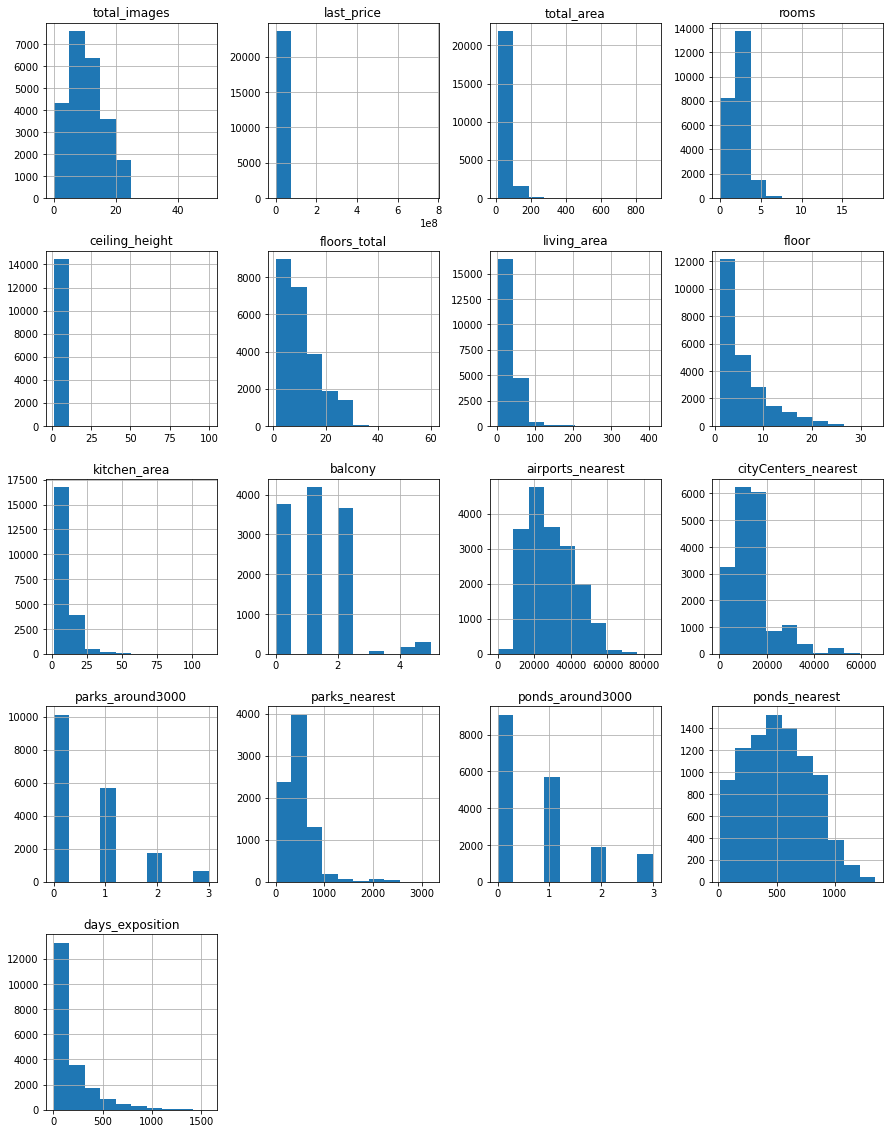

In [6]:
data.hist(figsize=(15, 20));

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

больше всего пропусков в столбце is_apartment, вероятней, люди продают квартиры, а не апартаменты.много пропусков о близлежащей инфраструктуры.некоторые данные имеют неверный тип данных. floors_total только целое число, так как количество этажей не может быть дробным. is_apartment должно иметь булевый тип.количество балконов(balcony) целое число, а не дробное.дата публикации объявление (first_day_exposition) должна иметь тип данных дата.

в данном разделе файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)

### Предобработка данных

In [8]:
data.balcony = data.balcony.fillna(0).astype('int', errors='ignore')

вероятно, у тех, кто не указал количество балконов, он отсутвует, поэтому заменим их 0 и переведем тип столбца в  int

In [9]:
data.is_apartment = data.is_apartment.fillna(False).astype('bool')

те, кто не указал принадлежность апартаментов, имеют квартиру 

In [10]:
data['floors_total'] = data['floors_total'].astype('int64', errors='ignore')


In [11]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


рассматривая значения высоты потолков, мы видим, что максимальное значение равно 100 м, такого быть не может,поэтому рассмотрим на диаграмме выбросы

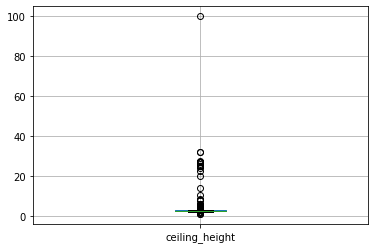

In [12]:
data.boxplot(column=['ceiling_height']);

 построив график боксплота, мы видим величину выбросов, много значений от 20 до 40 м, вероятно, что проблема в ошибке на один порядок,эти значения поделим на 10. но есть значения-выбросы, эти значения заменим на среднее  

In [13]:
data.loc[(data.ceiling_height > 20) & (data.ceiling_height < 50),'ceiling_height'] = (data.ceiling_height)/10

In [14]:
data.ceiling_height.describe()

count    14504.000000
mean         2.737054
std          0.878361
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

расчитаем величину "ящика с усами"(75 квантиль минус 25 квантиль), все отклонения, которые больше полтора "ящика с усами", являются выбросами, заменим их усредненным значением 

In [15]:
quantile = data.ceiling_height.quantile(.75) - data.ceiling_height.quantile(.25)

In [16]:
quantile

0.29000000000000004

In [17]:
data.loc[(data.ceiling_height > data.ceiling_height.quantile(.75)+1.5*quantile) | \
         (data.ceiling_height < data.ceiling_height.quantile(.25)-1.5*quantile),'ceiling_height']  \
= (data.ceiling_height).mean()





In [18]:
data.ceiling_height.describe()

count    14504.000000
mean         2.683372
std          0.179834
min          2.200000
25%          2.520000
50%          2.650000
75%          2.750000
max          3.230000
Name: ceiling_height, dtype: float64

In [19]:
data.ceiling_height.fillna(data.ceiling_height.mean())

0        2.700000
1        2.683372
2        2.683372
3        2.683372
4        3.030000
           ...   
23694    2.737054
23695    2.683372
23696    2.683372
23697    3.000000
23698    2.500000
Name: ceiling_height, Length: 23699, dtype: float64

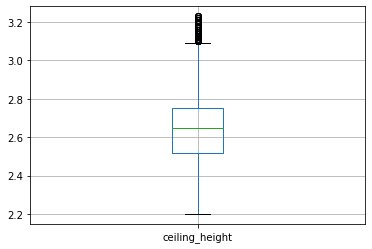

In [20]:
data.boxplot(column=['ceiling_height']);

далее рассмотрим пропуски в расстояниях до важной инфраструктуры. заметим, что пропусков населенных пунктов-мало, зато много пропусков расстояний до важной инфраструктуры. но для начала сведем название населенного пункта к единному стилю

In [21]:


data.locality_name = data.locality_name.str.replace('деревня ', '')


data.locality_name = data.locality_name.str.replace('ё', 'е')
data.locality_name = data.locality_name.str.replace('поселок ', '')

data.locality_name = data.locality_name.str.replace('городского типа ', '')

data.locality_name = data.locality_name.str.replace('при железнодорожной ', '')

data.locality_name = data.locality_name.str.replace('коттеджный ', '')
data.locality_name = data.locality_name.str.replace('село ', '')


data.locality_name = data.locality_name.str.replace('садоводческое некоммерческое товарищество ', '')

data.locality_name = data.locality_name.str.replace('садовое товарищество ', '')

data.locality_name = data.locality_name.str.replace('городской ', '')

In [22]:
data.locality_name.unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [ ]:
for index in data.airports_nearest.unique():
    data.loc[(data.locality_name == index) & (data.locality_name.isna()), 'airports_nearest']=\
    data.loc[data.airports_nearest == index,'airports_nearest'].mean()


In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')

изменим тип столбца на дату, для более удобной работы с ним

In [25]:
data.last_price.describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

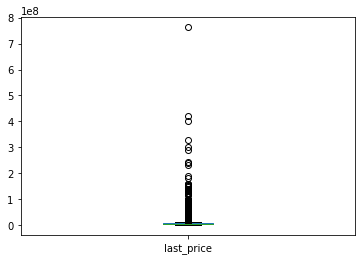

In [26]:
data.last_price.plot(kind='box');

In [27]:
old_data = data

In [28]:
old_data.shape

(23699, 22)

In [29]:
data = data.drop(data[data.last_price>100000000].index )

In [30]:
data.shape

(23662, 22)

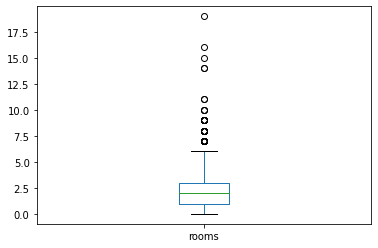

In [31]:
data.rooms.plot(kind='box');

In [32]:
data = data.drop(data[data.rooms>7].index )

In [33]:
data.shape

(23634, 22)

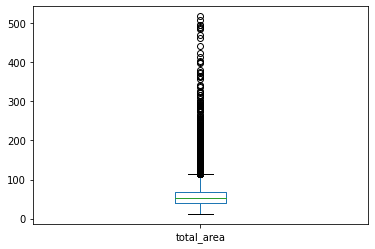

In [34]:
data.total_area.plot(kind='box');

In [35]:
data = data.drop(data[data.total_area > 200].index )

In [36]:
data.shape

(23462, 22)

In [37]:
(1-data.shape[0]/old_data.shape[0])

0.010000421958732408

мы удалил меньше 1% данных, что допустимо

в данном разделе была проведена предобработка данных. Были  определены пропущенные значения, заполнены пропущенные значения там, где это возможно, изменены типы данных, устранены неявные дубликаты в названиях населённых пунктов, устранены редкие и выбивающиеся значения (аномалии) во всех столбцах

### Посчитайте и добавьте в таблицу новые столбцы

создадим новые переменные

In [38]:
data['price_square_meter'] = data.last_price/data.total_area

In [39]:
data['month_publication'] = data['first_day_exposition'].dt.month

In [40]:
data['year_publication'] = data['first_day_exposition'].dt.year

In [41]:
data['is_first_last_floor'] = 'другой'

In [42]:
data.loc[data.floor == 1 , 'is_first_last_floor' ]='первый'

In [43]:
data.loc[data.floor == data.floors_total, 'is_first_last_floor' ]='последний'

In [44]:
data['city_ctntre_km'] = round(data.cityCenters_nearest/1000,0)

In [45]:
data['weekday_publication'] = data['first_day_exposition'].dt.weekday 

### Проведите исследовательский анализ данных

<AxesSubplot:>

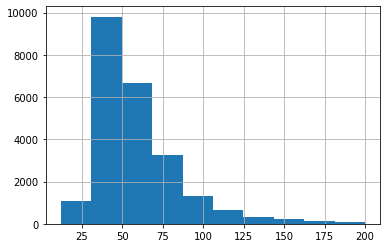

In [46]:
data.total_area.hist();

In [47]:
data.total_area.describe()

count    23462.000000
mean        58.131306
std         26.429068
min         12.000000
25%         40.000000
50%         51.800000
75%         68.872500
max        200.000000
Name: total_area, dtype: float64

<AxesSubplot:>

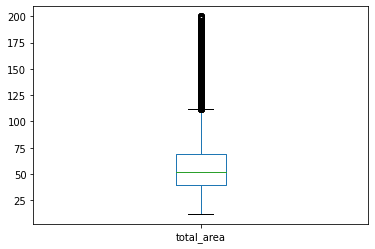

In [48]:
data.total_area.plot(kind='box')

In [49]:
(data.total_area > 200).sum()

0

средняя площадь  около 60 квадратных метров, а медианная 52.значит, что в выборке  имеются много помещений с небольшой площадью. на мой взгляд, ошибок в данных нет, так как помещений свыше 200 квадратных метров не так много

In [50]:
data.loc[data['living_area'] > 250,'living_area']=data.loc[data['living_area'] < 250,'living_area'].median()

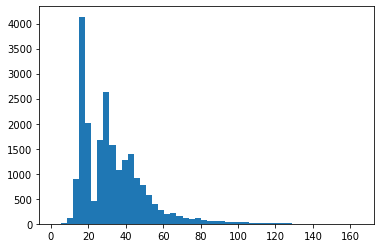

In [51]:
plt.hist(data['living_area'], bins=(50))
plt.show()

In [52]:
data.living_area.describe()

count    21587.000000
mean        33.224518
std         17.301727
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

<AxesSubplot:>

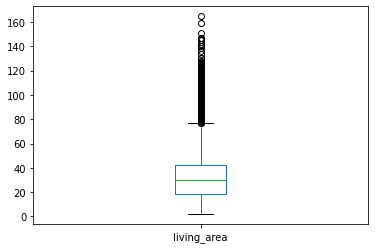

In [53]:
data.living_area.plot(kind='box')

In [54]:
(data.living_area > 100).sum()

168

по данным графикам видно, что жилые помещения имеют небольшую жилую площадь, медианное значение 30 квадратных метров. но есть и выбросы от 100 до 250 квадратных метров, их всего 340 

In [55]:
data.kitchen_area.describe()

count    21213.000000
mean        10.378447
std          5.337384
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

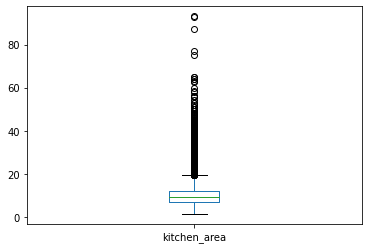

In [56]:
data.kitchen_area.plot(kind='box')

по графику видно,что есть выбросы более 50 квадратных метров, такие значения ошибочны, заменим их медианным значением

In [57]:
data.loc[data['kitchen_area'] > 50,'kitchen_area']=data.kitchen_area.median()

<AxesSubplot:>

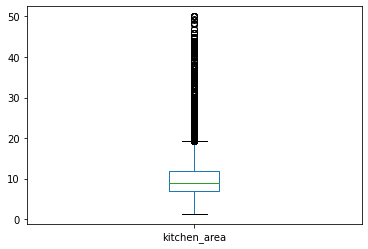

In [58]:
data.kitchen_area.plot(kind='box')

среднее значение площади кухни 10,57 , медианное значение 9,1.    

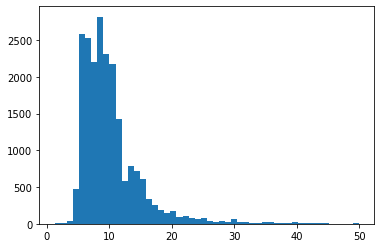

In [59]:
plt.hist(data['kitchen_area'], bins=(50))
plt.show()

изучив гистограмму, наблюдаем распределение Пуассона

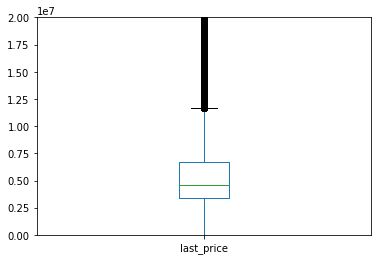

In [60]:

data.last_price.plot(kind='box')
plt.ylim(0,20000000)

plt.show()

In [61]:
(data.last_price > 12500000).sum()

1584

по данному графику мы видим большое количество выбросов. их 1817

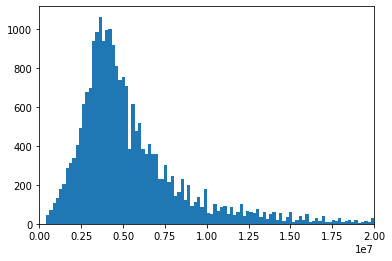

In [62]:
plt.hist(data['last_price'], bins=(500))
plt.xlim(0,20000000)
plt.show()

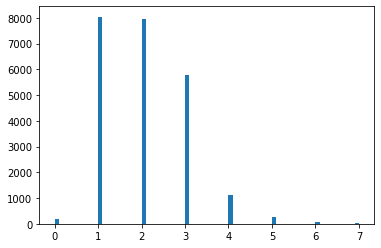

In [63]:
plt.hist(data.rooms,bins=70)
plt.show()

In [64]:
data.rooms.describe()

count    23462.000000
mean         2.033117
std          0.990756
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

из графика видно, что большинство объявлений имеет 1 или 2 комнату. таких объявлений порядка 8000 каждой категории, есть и объявления без комнат,  это квартиры-студии

In [65]:
data.ceiling_height.describe()

count    14349.000000
mean         2.681753
std          0.179266
min          2.200000
25%          2.510000
50%          2.650000
75%          2.750000
max          3.230000
Name: ceiling_height, dtype: float64

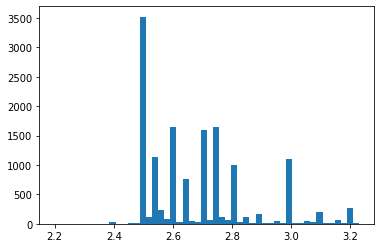

In [66]:
plt.hist(data.ceiling_height,bins=50)
plt.show()

большинство квартир имеют высоту потолко 2,5 м. 

In [67]:
data.floor.describe()

count    23462.000000
mean         5.902907
std          4.895075
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

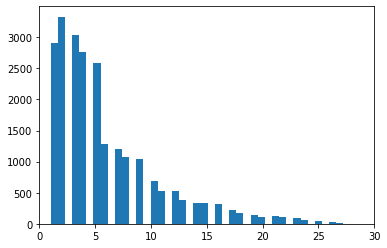

In [68]:
plt.hist(data.floor, bins=50)
plt.xlim(0,30)
plt.show()

по графику видно, что большинство квартир расположены на 2,3,4 этажах, квартир на 15 и выше очень мало(около 1000).


In [69]:
data.floors_total.describe()

count    23377.000000
mean        10.716602
std          6.606307
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

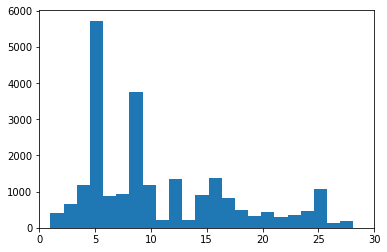

In [70]:
plt.hist(data.floors_total, bins=50)
plt.xlim(0,30)
plt.show()

большинство домов имеют 5 и 9 этажей. также присутствуют и одноэтажные дома 

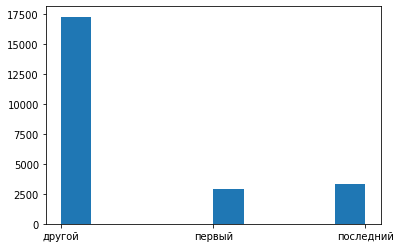

In [71]:
plt.hist(data.is_first_last_floor)
plt.show()

количество квартир на первыз и последних этажах примерно одинаковое, преобладающее количество не на первом и не последних этажах

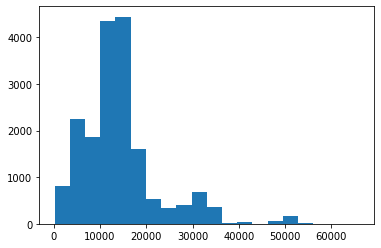

In [72]:
plt.hist(data.cityCenters_nearest,bins=20)
plt.show()

большинство квартир расположены близ города на растоянии 10-20 км от его центра.

In [73]:
data.airports_nearest.median()

26798.0

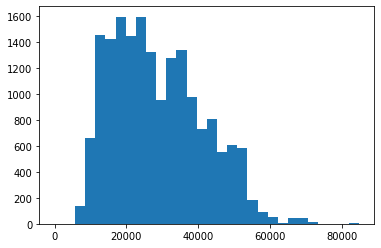

In [74]:
plt.hist(data.airports_nearest,bins=30)
plt.show()

большинство квартир расположены на растоянии 25 км от аэропорта. 

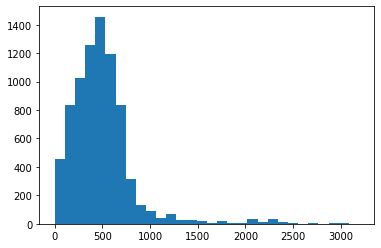

In [75]:
plt.hist(data.parks_nearest,bins=30)
plt.show()

In [76]:
data.parks_nearest.quantile(0.75)

613.0

парки расположены в пределах в 600 метрах от большинства квартир

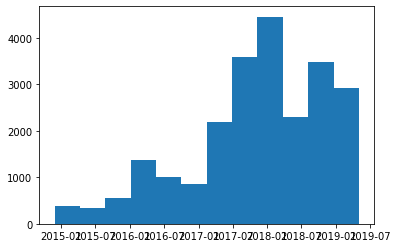

In [77]:
plt.hist(data.first_day_exposition, bins=12);

рассмотрев гистрограмму по месяцам, видим, что больше всего объявлений в начале года, а в конце постепенно снижается

это лишний график, гистограммы по дням неделям и месяцам построены ниже

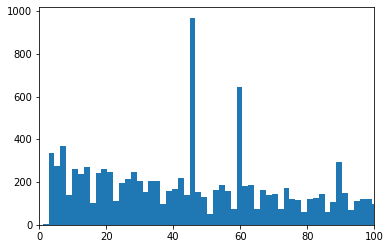

In [78]:
plt.hist(data.days_exposition,bins=900)
plt.xlim(0,100)
plt.show()

In [79]:
data.days_exposition.describe()

count    20337.000000
mean       179.683631
std        218.312249
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

изучив гистограмму срока продажи квартир, делаем вывод, что квартиры продаются в среднем 95 дней(медианное значение), хотя есть объявления которые "висят" более года.

построив диаграмму барплот и отсортировав значения площади по возрастанию, видно что при увеличении площади увеличивается и стоимость квартиры

In [80]:
data.total_area.corr(data.last_price)

0.7323288840385934

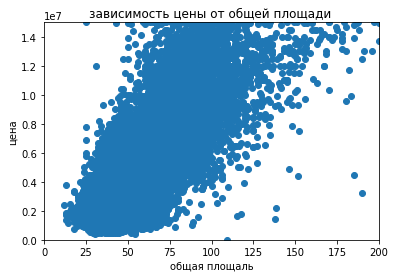

In [81]:
plt.scatter(data['total_area'],data['last_price'])
plt.ylim(0,15000000)
plt.xlim(0,200)
plt.ylabel('цена')
plt.xlabel('общая площаль')
plt.title('зависимость цены от общей площади ')
plt.show()

на этом графике видно, яркую линию: при росте площади растет и цена

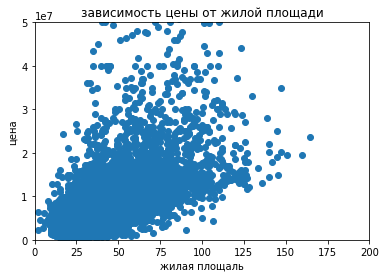

In [82]:
plt.scatter(data['living_area'],data['last_price'])
plt.ylim(0,50000000)
plt.xlim(0,200)
plt.ylabel('цена')
plt.xlabel('жилая площаль')
plt.title('зависимость цены от жилой площади')
plt.show()

In [83]:
data.living_area.corr(data.last_price)

0.618830050946264

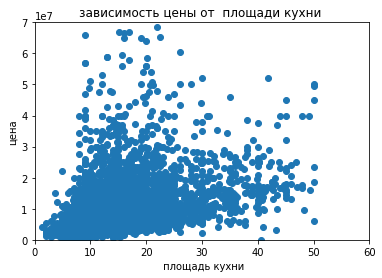

In [84]:
plt.scatter(data['kitchen_area'],data['last_price'])
plt.ylim(0,70000000)
plt.xlim(0,60)
plt.ylabel('цена')
plt.xlabel(' площадь кухни')
plt.title('зависимость цены от  площади кухни ')
plt.show()

In [85]:
data.living_area.corr(data.kitchen_area)

0.325901919424664

разброс увеличился по сравнению с зависимостью общей площади. это подтверждает и коэффициент корреляции, он стал меньше

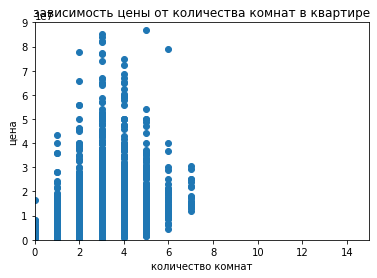

In [86]:
plt.scatter(data['rooms'],data['last_price'])
plt.ylim(0,90000000)
plt.xlim(0,15)
plt.ylabel('цена')
plt.xlabel('количество комнат')
plt.title('зависимость цены от количества комнат в квартире')
plt.show()

In [87]:
data.living_area.corr(data.rooms)

0.8718479801375562

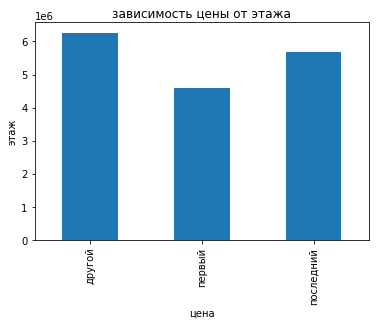

In [89]:
data.groupby('is_first_last_floor')['last_price'].mean().plot(kind='bar')
plt.ylabel('этаж')
plt.xlabel('цена')
plt.title('зависимость цены от этажа')
plt.show()

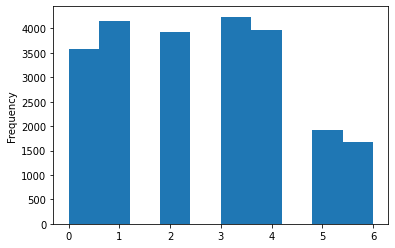

In [90]:
data.weekday_publication.plot(kind='hist');

по данной гистогремме мы видим, что больше всего объявлений появляется во вторник и четверг, однако в выходные дни их количество снижается в два раза

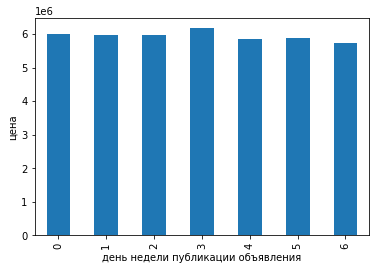

In [91]:
data.groupby('weekday_publication')['last_price'].mean().plot(kind='bar')
plt.ylabel('цена')
plt.xlabel('день недели публикации объявления')

plt.show()

самая высокая цена у объявлений, выложенных в четверг 

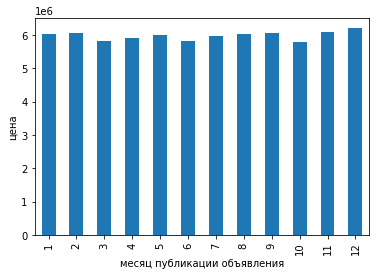

In [92]:
data.groupby('month_publication')['last_price'].mean().plot(kind='bar')
plt.ylabel('цена')
plt.xlabel('месяц публикации объявления')

plt.show()


самая высокая средняя цена у объявлений, выложенных в декабре

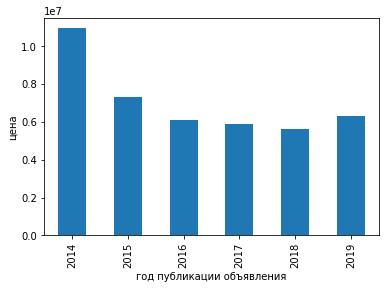

In [93]:
data.groupby('year_publication')['last_price'].mean().plot(kind='bar')
plt.ylabel('цена')
plt.xlabel('год публикации объявления')

plt.show()

самая высокие цены были в 2014 году, затем они снижались вплоть до 2018 года

In [94]:
data.locality_name.value_counts().head(10)

Санкт-Петербург    15498
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               364
Колпино              337
Парголово            326
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [95]:
pivot_data = data.pivot_table( index='locality_name', values='price_square_meter',aggfunc=['count', 'sum'])['count'].sort_values(by='price_square_meter',ascending=False).head(10)


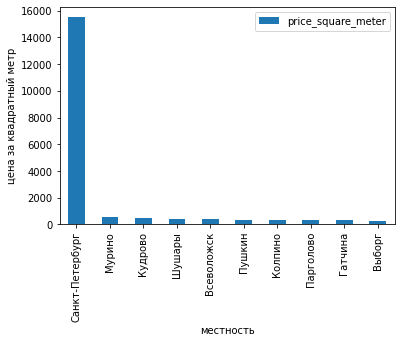

In [96]:
pivot_data.plot( kind='bar' )
plt.ylabel('цена за квадратный метр')
plt.xlabel('местность')

plt.show()

In [97]:
pivot_data

,price_square_meter
locality_name,
Санкт-Петербург,15498
Мурино,590
Кудрово,472
Шушары,440
Всеволожск,398
Пушкин,364
Колпино,337
Парголово,326
Гатчина,307


больше всего объявлений в санкт-петербурге. и цена за квадратный метр там самая высокая


In [98]:
km_per_centre_peterburg = data.loc[data.locality_name == 'Санкт-Петербург', ['price_square_meter','city_ctntre_km']]\
.sort_values('city_ctntre_km').dropna()


In [99]:
pivot2 = km_per_centre_peterburg.pivot_table(index='city_ctntre_km', values='price_square_meter')

In [100]:
pivot2.describe()


,price_square_meter
count,30.000000
mean,113776.840918
std,29662.529012
min,72953.365445
25%,94954.583077
50%,105890.443255
75%,127365.073132
max,223446.081658


так как медиана меньше среднего, то распределение искажено положительно, а это значит, что цена за квадратный метр уменьшается с увеличением растояния от центра, для проверки построим график, чтобы убедиться 


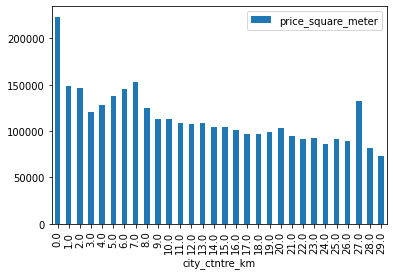

In [101]:
pivot2.plot( kind='bar');


как мы видим, самая высокая цена в центре города, с удалением от центра она начинает снижаться

### Общий вывод

в данном проекте были изучены данные по недвижимости в ленинградской области, были обработаны данные, изменены типы данных, выявлены дубликаты, аномалии, заполнены пропуски,где это было возможно.
Были созданы новые столбцы:цена одного квадратного метра,  месяц, год публикации объявления, тип этажа квартиры, расстояние в км до центра города.

Были изучены и описаны параметры помещений:общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат,высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. 

Анализ показал, что цена зависит от площади квартиры, количества комнат, но не зависит от месяца публикаций и этажа, имеем  динамику роста цены недвижимости в 2014 году и затем постепенный спад.Большинство объявлений имеют 1-2 комнаты, с высотой потолков 2,5 м, расположенных на 2,3,4 этажах, удаленных от центра города на растоянии 10-20 км. Большинство домов имеют 5 и 9 этажей. Больше всего объявлений в Санкт-Петербурге, там же и самая высокая цена за квадратный метр.самые дорогие квартиры находятся на растоянии 6-7 км от центра, затем по удалению снижается цена.Самая высокая цена в Санкт-Петербурге в центре города, с удалением от центра она начинает снижаться